In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
pd.set_option('display.max_columns', 500)

In [2]:
# Import the listings_cleaned csv file
listings_cleaned = pd.read_csv("datasets/listings_cleaned.csv", index_col=0)

In [3]:
# Print the head of listings_cleaned
listings_cleaned.head()

id  host_id  host_response_time  host_response_rate host_is_superhost  \
0  18666    71615      within an hour                0.99                 f   
1  18674    71615      within an hour                0.99                 f   
2  21605    82522  within a few hours                1.00                 f   
3  23197    90417      within an hour                1.00                 t   
4  25786   108310      within an hour                1.00                 t   

   host_listings_count  host_total_listings_count  \
0                 45.0                       45.0   
1                 45.0                       45.0   
2                  2.0                        2.0   
3                  5.0                        5.0   
4                  1.0                        1.0   

                                  host_verifications host_has_profile_pic  \
0  ['email', 'phone', 'reviews', 'jumio', 'govern...                    t   
1  ['email', 'phone', 'reviews', 'jumio', 'govern...                    t   
2  ['email', 'phone', 'reviews', 'jumio', 'offlin...                    t   
3  ['email', 'phone', 'reviews', 'jumio', 'offlin...                    t   
4  ['email', 'phone', 'reviews', 'jumio', 'offlin...                    t   

  host_identity_verified neighbourhood_group_cleansed                 city  \
0                      t                   Sant Martí            Barcelona   
1                      t                     Eixample            Barcelona   
2                      t                   Sant Martí            Barcelona   
3                      t                   Sant Martí  Sant Adria de Besos   
4                      t                       Gràcia            Barcelona   

   latitude  longitude property_type        room_type  accommodates  \
0  41.40889    2.18555     Apartment  Entire home/apt             6   
1  41.40420    2.17306     Apartment  Entire home/apt             8   
2  41.40560    2.19821     Apartment     Private room             2   
3  41.41203    2.22114     Apartment  Entire home/apt             6   
4  41.40145    2.15645     Apartment     Private room             2   

   bathrooms  bedrooms  beds  square_feet  price  weekly_price  monthly_price  \
0        1.0       2.0   4.0         75.0  130.0           NaN            NaN   
1        2.0       3.0   6.0          NaN   60.0           NaN            NaN   
2        1.0       1.0   1.0        108.0   33.0           NaN            NaN   
3        2.0       3.0   8.0          NaN  210.0           NaN            NaN   
4        1.0       1.0   1.0          NaN   45.0           NaN            NaN   

   security_deposit  cleaning_fee  guests_included  extra_people  \
0             150.0          42.0                2          25.0   
1             150.0          50.0                2          30.0   
2             100.0           NaN                1          10.0   
3             300.0          80.0                3          10.0   
4               NaN           NaN                1          25.0   

   minimum_nights  minimum_nights_avg_ntm has_availability  availability_30  \
0               3                     3.0                t                0   
1               1                     2.6                t                3   
2               2                     2.4                t                4   
3               3                     3.2                t               11   
4               1                     1.0                t                8   

   availability_60  availability_90  availability_365  number_of_reviews  \
0                0                0               182                  1   
1               20               50               129                 15   
2                8               15                15                119   
3               33               63               318                 45   
4               19               41               115                241   

   number_of_reviews_ltm 

This column will not be kept as we have enough info from the room_type column

# 1. Data Preparation for price analysis

The data needs to be prepared for the price analysis and we will take the following steps:
1. Get rid of the columns that are not interesting
2. Transform the categorical datas so we can perform the price analysis

## 1.1. Remove the columns that are not needed for the analysis

Let's remove the columns we don't need from listings_cleaned and create a new dataframe called listings.

In [4]:
# In order to help decide if we keep or not some categories we'll have a look at the values of these columns
# Values for the property_type column
listings_cleaned['property_type'].value_counts()

Apartment                 16843
Serviced apartment          688
Loft                        466
House                       380
Condominium                 361
Bed and breakfast           221
Hostel                      182
Guest suite                 168
Boutique hotel              123
Other                        69
Boat                         52
Hotel                        52
Aparthotel                   44
Casa particular (Cuba)       39
Guesthouse                   36
Townhouse                    36
Villa                        24
Nature lodge                  8
Tiny house                    8
Camper/RV                     7
Barn                          7
Dome house                    6
Chalet                        5
Earth house                   3
Farm stay                     2
Dorm                          1
Cottage                       1
Cabin                         1
Name: property_type, dtype: int64

This column will not be kept as we have enough info from the room_type column

The following fields are removed as they are assumed not to be relevant to the price variation:
'host_id', 'host_listings_count','host_total_listings_count', 'host_response_time','host_verifications','city','latitude','longitude','property_type','minimum_nights_avg_ntm','requires_license','license','cancellation_policy','calculated_host_listings_count','calculated_host_listings_count_entire_homes','calculated_host_listings_count_private_rooms','calculated_host_listings_count_shared_rooms' 

The following columns are removed as they don't have enough info (lots of Nans):
'weekly_price','monthly_price' (because they have a lot of Nans and we already have the price info in the daily price) and square_feet (because they have a lot of Nans)

'has_availability','availability_60','availability_90','availability_365' because we decide to only keep the availability at 30 days

'number_of_reviews' as we keep the number of reviews in the last twelve months called 'number_of_reviews_ltm'

In [5]:
# This is the list with all the columns left that we want to keep 
column_list = ['id','host_response_rate','host_is_superhost','host_has_profile_pic','host_identity_verified','neighbourhood_group_cleansed','room_type','accommodates','bathrooms','bedrooms','beds','price','security_deposit','cleaning_fee','guests_included','extra_people','minimum_nights','availability_30','number_of_reviews_ltm','review_scores_rating','reviews_per_month']

In [6]:
# Create a new dataframe called listings that contains only the columns we need
listings = listings_cleaned[column_list]

In [7]:
# Check the listings head
listings.head()

id  host_response_rate host_is_superhost host_has_profile_pic  \
0  18666                0.99                 f                    t   
1  18674                0.99                 f                    t   
2  21605                1.00                 f                    t   
3  23197                1.00                 t                    t   
4  25786                1.00                 t                    t   

  host_identity_verified neighbourhood_group_cleansed        room_type  \
0                      t                   Sant Martí  Entire home/apt   
1                      t                     Eixample  Entire home/apt   
2                      t                   Sant Martí     Private room   
3                      t                   Sant Martí  Entire home/apt   
4                      t                       Gràcia     Private room   

   accommodates  bathrooms  bedrooms  beds  square_feet  price  \
0             6        1.0       2.0   4.0         75.0  130.0   
1             8        2.0       3.0   6.0          NaN   60.0   
2             2        1.0       1.0   1.0        108.0   33.0   
3             6        2.0       3.0   8.0          NaN  210.0   
4             2        1.0       1.0   1.0          NaN   45.0   

   security_deposit  cleaning_fee  guests_included  extra_people  \
0             150.0          42.0                2          25.0   
1             150.0          50.0                2          30.0   
2             100.0           NaN                1          10.0   
3             300.0          80.0                3          10.0   
4               NaN           NaN                1          25.0   

   minimum_nights  availability_30  number_of_reviews_ltm  \
0               3                0                      0   
1               1                3                     10   
2               2                4                     36   
3               3               11                     16   
4               1                8                     49   

   review_scores_rating  reviews_per_month  
0                  80.0               0.02  
1                  87.0               0.20  
2                  90.0               3.08  
3                  95.0               0.44  
4                  95.0               2.22

## 1.2. Selection of Appartments listings only

It is assumed that the prices for a room or a full appartment are very different so we will start by focusing on the appartments.

In [8]:
# Create a Dataframe with the appartments only
listings_apt = listings[listings["room_type"]=="Entire home/apt"]

In [9]:
# Checking the room_type column to see that it worked
listings_apt['room_type'].value_counts()

Entire home/apt    9475
Name: room_type, dtype: int64

In [10]:
# Remove the room_type column, reset the index and drop the old one
listings_apt = listings_apt.drop(["room_type"], axis=1).reset_index(drop=True)

In [11]:
# Check it worked
listings_apt.head()

id  host_response_rate host_is_superhost host_has_profile_pic  \
0  18666                0.99                 f                    t   
1  18674                0.99                 f                    t   
2  23197                1.00                 t                    t   
3  31958                0.92                 f                    t   
4  32471                0.92                 f                    t   

  host_identity_verified neighbourhood_group_cleansed  accommodates  \
0                      t                   Sant Martí             6   
1                      t                     Eixample             8   
2                      t                   Sant Martí             6   
3                      f                       Gràcia             4   
4                      f                       Gràcia             5   

   bathrooms  bedrooms  beds  square_feet  price  security_deposit  \
0        1.0       2.0   4.0         75.0  130.0             150.0   
1        2.0       3.0   6.0          NaN   60.0             150.0   
2        2.0       3.0   8.0          NaN  210.0             300.0   
3        1.0       1.0   1.0          NaN   75.0             200.0   
4        1.5       3.0   3.0          NaN   85.0             200.0   

   cleaning_fee  guests_included  extra_people  minimum_nights  \
0          42.0                2          25.0               3   
1          50.0                2          30.0               1   
2          80.0                3          10.0               3   
3          55.0                4           0.0               1   
4         105.0                5           0.0               1   

   availability_30  number_of_reviews_ltm  review_scores_rating  \
0                0                      0                  80.0   
1                3                     10                  87.0   
2               11                     16                  95.0   
3                2                     34                  92.0   
4                3                     15                  88.0   

   reviews_per_month  
0               0.02  
1               0.20  
2               0.44  
3               1.70  
4               0.76

## 1.3. First look at the data

In [14]:
import sys
!{sys.executable} -m pip install pandas-profiling
import pandas_profiling 
pandas_profiling.ProfileReport(listings_apt) 

## 1.4. Find the outliers in the price data

In [12]:
# Look at possible outliers in the column room_price using the IQR method with np.precentile method
# In order for it to function I need to remove the rows with missing price value i.e. Nan values (124 rows in total)
listings_apt = listings_apt.dropna(subset=['price'], how='all')

In [13]:
# Check the limits above which we suspect we have outliers
q1 = np.percentile(listings_apt['price'], 25)
q3 = np.percentile(listings_apt['price'], 75)
iqr = q3 - q1
upper_fence = q3 + 3 * iqr
lower_fence = q1 - 3 * iqr
print(upper_fence)

426.0


This means that we might find outliers for appartments where the price is superior to 426.

Let's have a look at the histogram for the prices in order to see the price distribution.

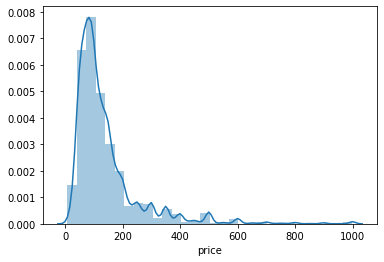

In [29]:
# Display the histogram for the price variation
sns.distplot(listings_apt["price"], 30)

We can see that there are a lot of prices that are above 426 and we will check them to see if we need to keep them or eliminate them.

## 1.5. Clean the price data 

Let´s look at some of the highest prices to analyse if they are real. We will do that using the original data set so we 
can access the url in order to check the real listing

In [14]:
# import the listing file in a dataframe called listings_raw
listings_raw = pd.read_csv("datasets/listings_new.csv")

C:\Users\ASUS\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3057: DtypeWarning: Columns (43,61,62) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [15]:
# Find the highest prices (> 426€) with their corresponding id, URL, weekly and monthly price for appartments only
## Select appartments only
listings_raw = listings_raw[listings_raw["room_type"]=="Entire home/apt"]
## Select only the 9 interesting columns
listings_raw_price = listings_raw[["id", "listing_url","price","weekly_price","monthly_price","accommodates","bathrooms","bedrooms","beds"]]
## Remove the $ symbol in the price column
listings_raw_price = listings_raw_price.replace({'\$': ''}, regex=True)
## Convert price from object to a numeric column
listings_raw_price[["price"]] = listings_raw_price[["price"]].apply(pd.to_numeric, errors='coerce', axis=1)

In [16]:
# Select the prices that are more than 426 and order them by descending values
listings_raw_high_price = listings_raw_price[listings_raw_price['price']>426].sort_values(by='price', ascending=False)

In [30]:
# Show the result
listings_raw_high_price

id                            listing_url  price weekly_price  \
3353    6669821   https://www.airbnb.com/rooms/6669821  950.0          NaN   
14366  30757362  https://www.airbnb.com/rooms/30757362  900.0          NaN   
14361  30756180  https://www.airbnb.com/rooms/30756180  900.0          NaN   
14291  30552236  https://www.airbnb.com/rooms/30552236  900.0          NaN   
14170  30332969  https://www.airbnb.com/rooms/30332969  900.0          NaN   
9061   20847687  https://www.airbnb.com/rooms/20847687  900.0          NaN   
421      659207    https://www.airbnb.com/rooms/659207  900.0          NaN   
120      267816    https://www.airbnb.com/rooms/267816  900.0     3,500.00   
10953  24167970  https://www.airbnb.com/rooms/24167970  899.0          NaN   
3051    5767967   https://www.airbnb.com/rooms/5767967  899.0     4,200.00   
7931   18950001  https://www.airbnb.com/rooms/18950001  890.0          NaN   
8139   19321989  https://www.airbnb.com/rooms/19321989  850.0          NaN   
8059   19186324  https://www.airbnb.com/rooms/19186324  850.0          NaN   
6493   16079084  https://www.airbnb.com/rooms/16079084  810.0          NaN   
5320   13068933  https://www.airbnb.com/rooms/13068933  805.0          NaN   
9951   22474807  https://www.airbnb.com/rooms/22474807  800.0          NaN   
7313   17808668  https://www.airbnb.com/rooms/17808668  800.0          NaN   
9950   22474717  https://www.airbnb.com/rooms/22474717  800.0          NaN   
9953   22475072  https://www.airbnb.com/rooms/22475072  800.0          NaN   
13113  28167451  https://www.airbnb.com/rooms/28167451  800.0          NaN   
9948   22463569  https://www.airbnb.com/rooms/22463569  800.0          NaN   
8666   20066721  https://www.airbnb.com/rooms/20066721  800.0          NaN   
5286   12977142  https://www.airbnb.com/rooms/12977142  800.0          NaN   
12908  27743172  https://www.airbnb.com/rooms/27743172  800.0          NaN   
15173  32078808  https://www.airbnb.com/rooms/32078808  790.0          NaN   
4264    9456475   https://www.airbnb.com/rooms/9456475  789.0          NaN   
790     1005420   https://www.airbnb.com/rooms/1005420  780.0          NaN   
7334   17840774  https://www.airbnb.com/rooms/17840774  763.0          NaN   
7038   17380063  https://www.airbnb.com/rooms/17380063  755.0          NaN   
17047  34349554  https://www.airbnb.com/rooms/34349554  750.0          NaN   
...         ...                                    ...    ...          ...   
1735    2439285   https://www.airbnb.com/rooms/2439285  450.0     1,900.00   
496      728480    https://www.airbnb.com/rooms/728480  450.0     1,400.00   
1017    1234139   https://www.airbnb.com/rooms/1234139  450.0          NaN   
2181    3364803   https://www.airbnb.com/rooms/3364803  450.0          NaN   
3350    6667516   https://www.airbnb.com/rooms/6667516  450.0          NaN   
4462   10065521  https://www.airbnb.com/rooms/10065521  450.0          NaN   
1567    2138071   https://www.airbnb.com/rooms/2138071  450.0          NaN   
6061   14498705  https://www.airbnb.com/rooms/14498705  450.0          NaN   
713      937547    https://www.airbnb.com/rooms/937547  450.0          NaN   
7266   17725664  https://www.airbnb.com/rooms/17725664  450.0          NaN   
6684   16538380  https://www.airbnb.com/rooms/16538380  450.0          NaN   
1008    1222290   https://www.airbnb.com/rooms/1222290  450.0          NaN   
802     1016104   https://www.airbnb.com/rooms/1016104  450.0     1,700.00   
16701  33980441  https://www.airbnb.com/rooms/33980441  450.0          NaN   
15433  32376264  https://www.airbnb.com/rooms/32376264  450.0          NaN   
19112  36125672  https://www.airbnb.com/rooms/36125672  450.0          NaN   
14876  31562853  https://www.airbnb.com/rooms/31562853  447.0          NaN   
10754  23781693  https://www.airbnb.com/rooms/23781693  445.0          NaN   
15391  32338200  https://www.airbnb.com/rooms/32338200  445.0          NaN   
3790    7793542   https://www.airbn

From the analysis of the prices above 426 we noticed various listings where the scraped price is wrong.

Therefore we will eliminate the listings with the following conditions:
1. Listings with the price equal to 999 and 599. All listings with this price are wrong due to a scraping error 
2. All listings with a price superior to 599 and that have a number of bathrooms inferior or equal to 2
3. All listings with a price superior to 599 and that have a number of bedrooms inferior or equal to 3

In the case of 2. and 3., most of the listings that have been detected to be wrong have a too low number of bathrroms and bedrooms for such a high price.

In [38]:
# Eliminate listings with prices equal to 999 and 599
listings_apt = listings_apt[listings_apt['price']!=999]
listings_apt = listings_apt[listings_apt['price']!=599]

In [40]:
# Eliminate listings with a price superior to 599 and that have a number of bathrooms inferior or equal to 2
## Find the indexes that correspond to the condition you want to remove
indexNames1 = listings_apt[ (listings_apt['price'] > 599) & (listings_apt['bathrooms'] <= 2) ].index
## Drop all the selected indexes
listings_apt.drop(indexNames1 , inplace=True)

In [41]:
# Eliminate listings with a price superior to 599 and that have a number of bedrooms inferior or equal to 3
## Find the indexes that correspond to the condition you want to remove
indexNames2 = listings_apt[ (listings_apt['price'] > 599) & (listings_apt['bedrooms'] <= 3) ].index
## Drop all the selected indexes
listings_apt.drop(indexNames2 , inplace=True)

In [42]:
listings_apt.head()

id  host_response_rate host_is_superhost host_has_profile_pic  \
0  18666                0.99                 f                    t   
1  18674                0.99                 f                    t   
2  23197                1.00                 t                    t   
3  31958                0.92                 f                    t   
4  32471                0.92                 f                    t   

  host_identity_verified neighbourhood_group_cleansed  accommodates  \
0                      t                   Sant Martí             6   
1                      t                     Eixample             8   
2                      t                   Sant Martí             6   
3                      f                       Gràcia             4   
4                      f                       Gràcia             5   

   bathrooms  bedrooms  beds  square_feet  price  security_deposit  \
0        1.0       2.0   4.0         75.0  130.0             150.0   
1        2.0       3.0   6.0          NaN   60.0             150.0   
2        2.0       3.0   8.0          NaN  210.0             300.0   
3        1.0       1.0   1.0          NaN   75.0             200.0   
4        1.5       3.0   3.0          NaN   85.0             200.0   

   cleaning_fee  guests_included  extra_people  minimum_nights  \
0          42.0                2          25.0               3   
1          50.0                2          30.0               1   
2          80.0                3          10.0               3   
3          55.0                4           0.0               1   
4         105.0                5           0.0               1   

   availability_30  number_of_reviews_ltm  review_scores_rating  \
0                0                      0                  80.0   
1                3                     10                  87.0   
2               11                     16                  95.0   
3                2                     34                  92.0   
4                3                     15                  88.0   

   reviews_per_month  
0               0.02  
1               0.20  
2               0.44  
3               1.70  
4               0.76

## 1.6. Transform the categorical values

In order to use Machine Learning for the price prediction we need to transform all categorical data.

We will do so the following columns: 
host_is_superhost,host_has_profile_pic,host_identity_verified,neighbourhood_group_cleansed

But first I will change the names of these columns to make it simpler.

In [43]:
# Change the columns names
listings_apt = listings_apt.rename(columns = {"host_is_superhost":"superhost", "host_has_profile_pic":"host_pic", "host_identity_verified":"hostid_verified", "neighbourhood_group_cleansed":"hood"})

In [44]:
# Check the column names have been changed
listings_apt.head()

id  host_response_rate superhost host_pic hostid_verified        hood  \
0  18666                0.99         f        t               t  Sant Martí   
1  18674                0.99         f        t               t    Eixample   
2  23197                1.00         t        t               t  Sant Martí   
3  31958                0.92         f        t               f      Gràcia   
4  32471                0.92         f        t               f      Gràcia   

   accommodates  bathrooms  bedrooms  beds  square_feet  price  \
0             6        1.0       2.0   4.0         75.0  130.0   
1             8        2.0       3.0   6.0          NaN   60.0   
2             6        2.0       3.0   8.0          NaN  210.0   
3             4        1.0       1.0   1.0          NaN   75.0   
4             5        1.5       3.0   3.0          NaN   85.0   

   security_deposit  cleaning_fee  guests_included  extra_people  \
0             150.0          42.0                2          25.0   
1             150.0          50.0                2          30.0   
2             300.0          80.0                3          10.0   
3             200.0          55.0                4           0.0   
4             200.0         105.0                5           0.0   

   minimum_nights  availability_30  number_of_reviews_ltm  \
0               3                0                      0   
1               1                3                     10   
2               3               11                     16   
3               1                2                     34   
4               1                3                     15   

   review_scores_rating  reviews_per_month  
0                  80.0               0.02  
1                  87.0               0.20  
2                  95.0               0.44  
3                  92.0               1.70  
4                  88.0               0.76

In [45]:
# Transform the categorical columns in numerical
## First we need to transform the data type of the columns to categorical
listings_apt['superhost'] = pd.Categorical(listings_apt['superhost'])
listings_apt['host_pic'] = pd.Categorical(listings_apt['host_pic'])
listings_apt['hostid_verified'] = pd.Categorical(listings_apt['hostid_verified'])
listings_apt['hood'] = pd.Categorical(listings_apt['hood'])

In [46]:
# Second we apply to get_dummies method to get the 0 and 1 applied to all the columns respectively
encoding_superhost = pd.get_dummies(listings_apt['superhost'])
encoding_host_pic = pd.get_dummies(listings_apt['host_pic'])
encoding_hostid_verified = pd.get_dummies(listings_apt['hostid_verified'])
encoding_hood = pd.get_dummies(listings_apt['hood'])

In [47]:
encoding_superhost.head()

f  t
0  1  0
1  1  0
2  0  1
3  1  0
4  1  0

In [49]:
# Then we need to concatenate all the dummies dataframes to the main dataframe
listings_ml = pd.concat([listings_apt, encoding_superhost, encoding_host_pic, encoding_hostid_verified, encoding_superhost])

In [50]:
listings_ml.head()



accommodates  availability_30  bathrooms  bedrooms  beds  cleaning_fee  \
0           6.0              0.0        1.0       2.0   4.0          42.0   
1           8.0              3.0        2.0       3.0   6.0          50.0   
2           6.0             11.0        2.0       3.0   8.0          80.0   
3           4.0              2.0        1.0       1.0   1.0          55.0   
4           5.0              3.0        1.5       3.0   3.0         105.0   

   extra_people   f  guests_included        hood host_pic  host_response_rate  \
0          25.0 NaN              2.0  Sant Martí        t                0.99   
1          30.0 NaN              2.0    Eixample        t                0.99   
2          10.0 NaN              3.0  Sant Martí        t                1.00   
3           0.0 NaN              4.0      Gràcia        t                0.92   
4           0.0 NaN              5.0      Gràcia        t                0.92   

  hostid_verified       id  minimum_nights  number_of_reviews_ltm  price  \
0               t  18666.0             3.0                    0.0  130.0   
1               t  18674.0             1.0                   10.0   60.0   
2               t  23197.0             3.0                   16.0  210.0   
3               f  31958.0             1.0                   34.0   75.0   
4               f  32471.0             1.0                   15.0   85.0   

   review_scores_rating  reviews_per_month  security_deposit  square_feet  \
0                  80.0               0.02             150.0         75.0   
1                  87.0               0.20             150.0          NaN   
2                  95.0               0.44             300.0          NaN   
3                  92.0               1.70             200.0          NaN   
4                  88.0               0.76             200.0          NaN   

  superhost   t  
0         f NaN  
1         f NaN  
2         t NaN  
3         f NaN  
4         f NaN

In [ ]:
XXXX Check the shape has been reduced after all the removal of listings that were wrong...